# How well do jobs and skills pay for all data roles?

#### Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill
3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
# Filter Data for US
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg']).copy()

# Top 6 Job Titles
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

df_US_top6


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [9]:
# Order Job Titles by Median Salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

# Boxplots of Average Yearly Salary Distributions for All Data Roles in the US

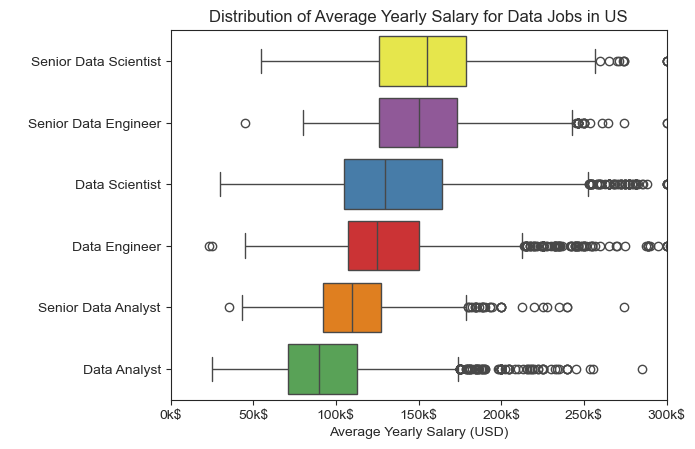

In [10]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', hue='job_title_short', palette='Set1', order=job_order)
sns.set_style('ticks')
plt.title('Distribution of Average Yearly Salary for Data Jobs in US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel(' ')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k$'))
plt.show()

In [14]:
# Filter only for entry-level data roles
non_senior_roles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US_non_senior = df_US[df_US['job_title_short'].isin(non_senior_roles)].copy()
df_US_data = df_US_non_senior.explode('job_skills')
df_US_data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,sql,"{'programming': ['sql', 'python']}"
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,python,"{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,sql,"{'programming': ['sql', 'r', 'python'], 'webfr..."
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,r,"{'programming': ['sql', 'r', 'python'], 'webfr..."
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,python,"{'programming': ['sql', 'r', 'python'], 'webfr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,snowflake,"{'cloud': ['azure', 'snowflake'], 'libraries':..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,spark,"{'cloud': ['azure', 'snowflake'], 'libraries':..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,python,"{'programming': ['python', 'matlab', 'r']}"
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,matlab,"{'programming': ['python', 'matlab', 'r']}"


In [18]:
# Get the top 10 skills with the highest median salary
df_data_top_pay = df_US_data.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)
df_data_top_pay = df_data_top_pay.head(10)
print(df_data_top_pay)

# Get the the top 10 skills with the highest number of job postings
df_data_top_count = df_US_data.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)
df_data_top_count = df_data_top_count.head(10).sort_values('median', ascending=False)
df_data_top_count

               count        median
job_skills                        
mongo             91  200256.00000
unreal             5  200000.00000
ruby on rails      9  180000.00000
solidity           6  177000.00000
elixir             2  175610.34375
hugging face      17  175000.00000
dplyr             15  167500.00000
objective-c        1  164500.00000
theano            20  160000.00000
atlassian         43  159500.00000


,count,median
job_skills,,
spark,1780,134775.0
aws,2295,130000.0
python,6796,125000.0
azure,1629,124000.0
r,3202,115800.0
sql,7081,115000.0
tableau,2767,110000.0
sas,2074,105000.0
power bi,1478,100000.0


# Bar Charts of Top Paying Skills for Entry Level Data Roles

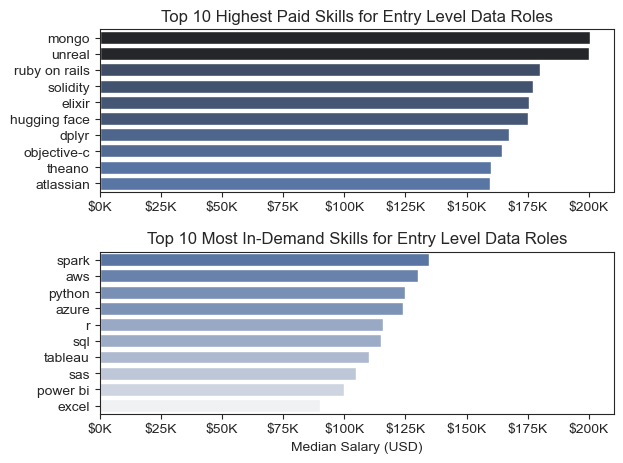

In [19]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_data_top_pay, x='median', y=df_data_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_data_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Entry Level Data Roles')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_data_top_count, x='median', y=df_data_top_count.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_data_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Entry Level Data Roles')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()